In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [5]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [6]:
df['Pclass'] = df['Pclass'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

C:\Users\EEKSHITA\AppData\Local\Temp\ipykernel_20264\959249874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\EEKSHITA\AppData\Local\Temp\ipykernel_20264\959249874.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

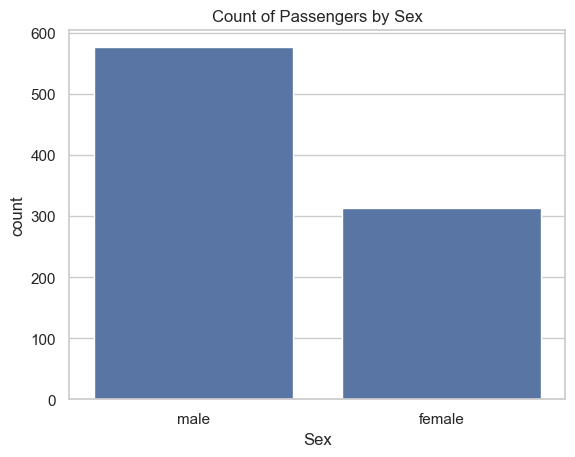

Observation:
There are more male passengers than female passengers on the Titanic.


In [8]:
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Sex')
plt.show()
print("Observation:")
print("There are more male passengers than female passengers on the Titanic.")

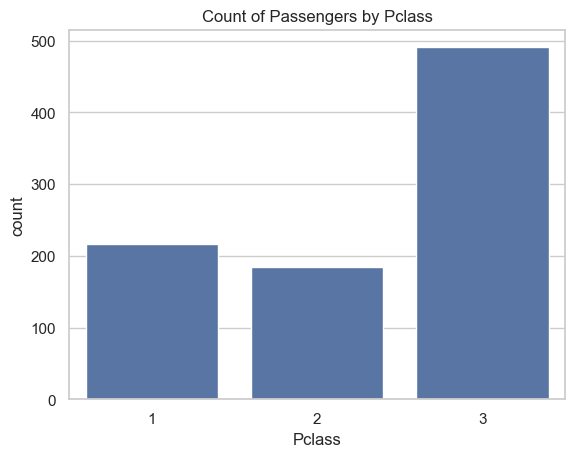

Observation 1 (Pclass):
Most passengers were in Pclass 3, followed by Pclass 1 and 2.


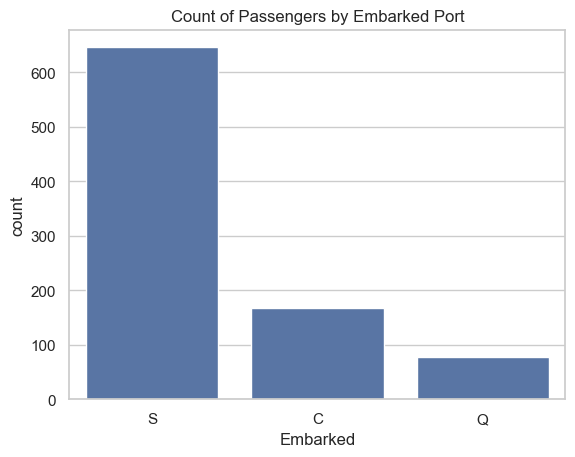

Observation 2 (Embarked):
Most passengers boarded from port 'S', with fewer from 'C' and 'Q'.


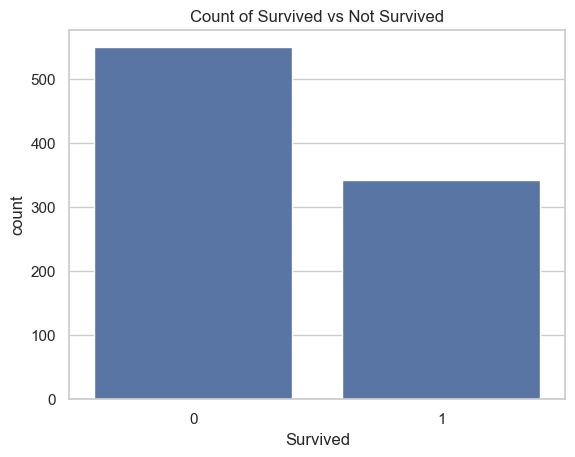

Observation 3 (Survived):
More passengers did not survive compared to those who survived.


In [10]:
# Pclass
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Pclass')
plt.show()
print("Observation 1 (Pclass):")
print("Most passengers were in Pclass 3, followed by Pclass 1 and 2.")

# Embarked
sns.countplot(x='Embarked', data=df)
plt.title('Count of Passengers by Embarked Port')
plt.show()
print("Observation 2 (Embarked):")
print("Most passengers boarded from port 'S', with fewer from 'C' and 'Q'.")

# Survived
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs Not Survived')
plt.show()
print("Observation 3 (Survived):")
print("More passengers did not survive compared to those who survived.")

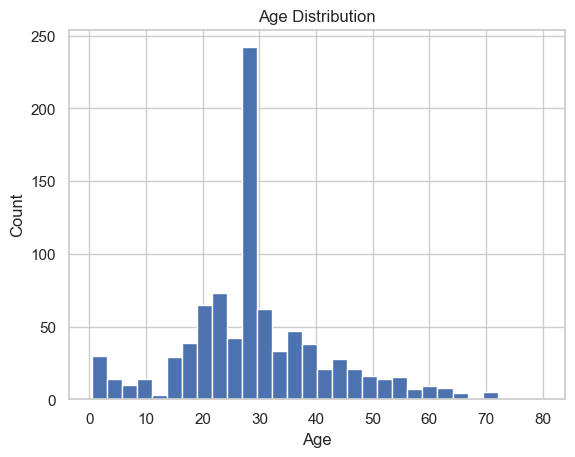

Observation 1 (Age Distribution):
The Age distribution is fairly spread out, with many passengers between ages 20–40.


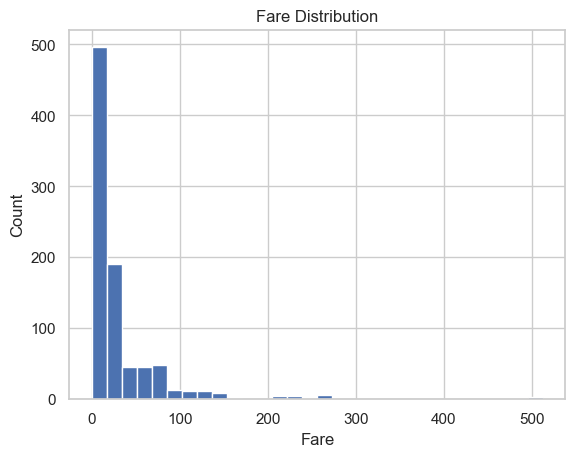

Observation 2 (Fare Distribution):
Fare is right-skewed — a few passengers paid very high fares.


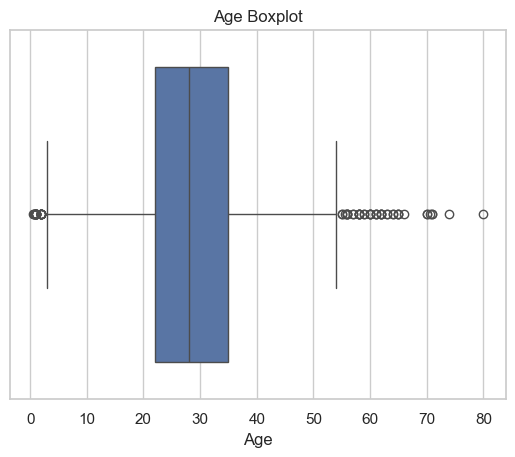

Observation 3 (Age Boxplot):
No extreme outliers; age values appear within a reasonable range.


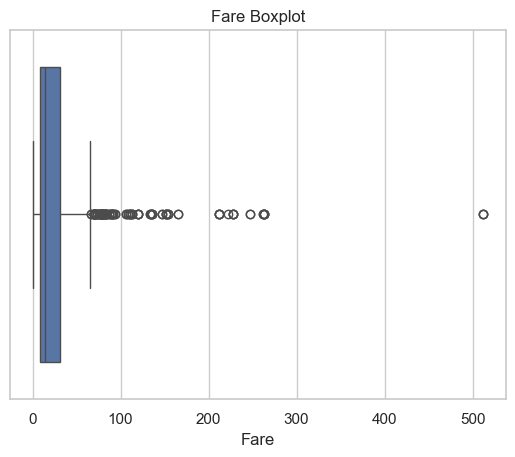

Observation 4 (Fare Boxplot):
There are several high Fare outliers, confirming the skew observed in the histogram.


In [12]:
# Age distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("Observation 1 (Age Distribution):")
print("The Age distribution is fairly spread out, with many passengers between ages 20–40.")

# Fare distribution
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()
print("Observation 2 (Fare Distribution):")
print("Fare is right-skewed — a few passengers paid very high fares.")

# Boxplots for Age and Fare
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.show()
print("Observation 3 (Age Boxplot):")
print("No extreme outliers; age values appear within a reasonable range.")

sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()
print("Observation 4 (Fare Boxplot):")
print("There are several high Fare outliers, confirming the skew observed in the histogram.")

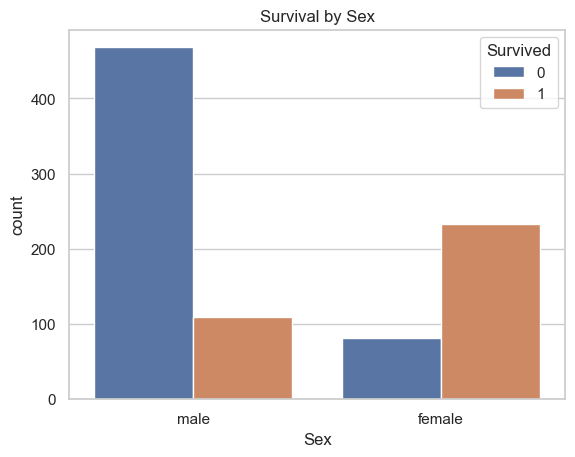

Observation 1 (Sex vs Survived):
Females had a much higher survival rate than males.


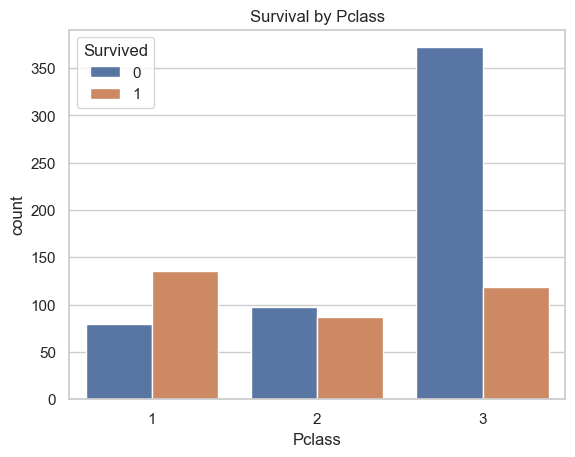

Observation 2 (Pclass vs Survived):
Passengers in Pclass 1 survived more compared to Pclass 2 and especially Pclass 3.


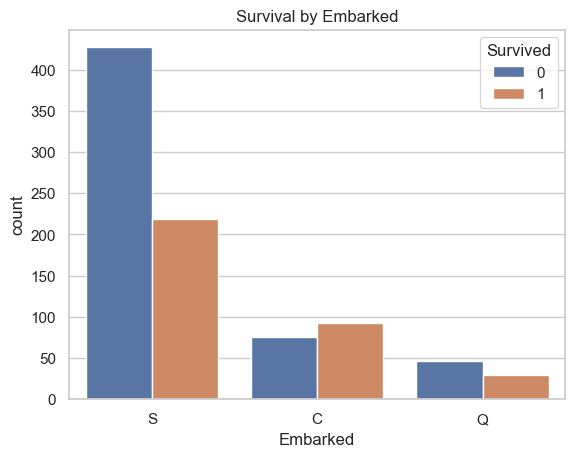

Observation 3 (Embarked vs Survived):
Passengers who boarded at 'C' had a higher survival rate compared to 'S' and 'Q'.


In [13]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()
print("Observation 1 (Sex vs Survived):")
print("Females had a much higher survival rate than males.")

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()
print("Observation 2 (Pclass vs Survived):")
print("Passengers in Pclass 1 survived more compared to Pclass 2 and especially Pclass 3.")

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')
plt.show()
print("Observation 3 (Embarked vs Survived):")
print("Passengers who boarded at 'C' had a higher survival rate compared to 'S' and 'Q'.")

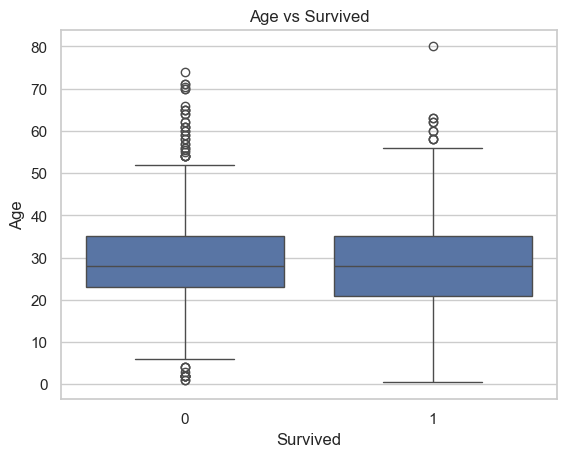

Observation 1 (Age vs Survived):
Survivors tend to be slightly younger on average, but both groups show a wide age range.


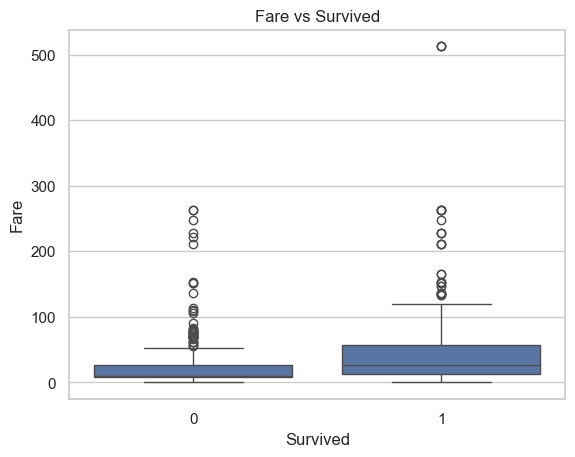

Observation 2 (Fare vs Survived):
Passengers who survived generally paid higher fares, indicating that passengers in higher classes had better survival chances.


In [14]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()
print("Observation 1 (Age vs Survived):")
print("Survivors tend to be slightly younger on average, but both groups show a wide age range.")

# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survived')
plt.show()
print("Observation 2 (Fare vs Survived):")
print("Passengers who survived generally paid higher fares, indicating that passengers in higher classes had better survival chances.")

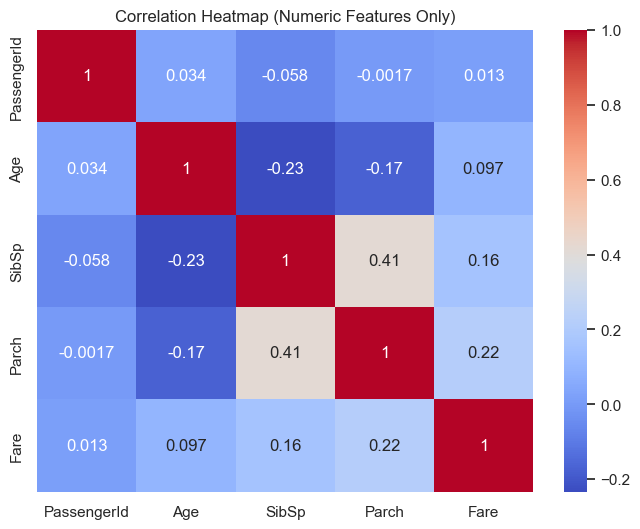

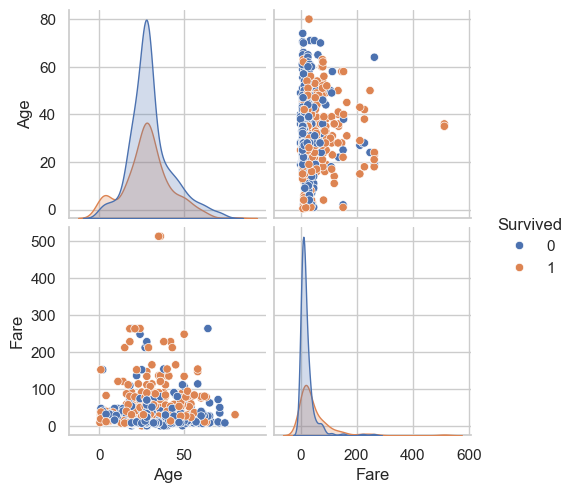

Observation 1 (Heatmap):
Fare and Pclass show a strong negative correlation (higher class = lower Pclass number = higher fare). Age has weak correlations with most variables.

Observation 2 (Pairplot):
The pairplot visually confirms that survivors tend to have higher fares and belong more often to Pclass 1.

Observation 3 (Heatmap vs Pairplot difference):
Heatmap shows numeric correlation values, while Pairplot shows actual data point distributions and separation patterns.


In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

sns.pairplot(df[['Age','Fare','Pclass','Survived']], hue='Survived')
plt.show()

print("Observation 1 (Heatmap):")
print("Fare and Pclass show a strong negative correlation (higher class = lower Pclass number = higher fare). Age has weak correlations with most variables.")

print("\nObservation 2 (Pairplot):")
print("The pairplot visually confirms that survivors tend to have higher fares and belong more often to Pclass 1.")

print("\nObservation 3 (Heatmap vs Pairplot difference):")
print("Heatmap shows numeric correlation values, while Pairplot shows actual data point distributions and separation patterns.")

In [21]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create log-transformed Fare feature (handles skewness)
df['Fare_log'] = np.log1p(df['Fare'])

df[['FamilySize', 'Fare_log']].head()

print("Observation:")
print("FamilySize helps represent group travel behavior, and Fare_log reduces the effect of extreme fare outliers.")

Observation:
FamilySize helps represent group travel behavior, and Fare_log reduces the effect of extreme fare outliers.
